Conductor 1 charge density range: 4.4759612052444884e-13 3.320711945048494e-12
Conductor 1 total charge: 2.9425000968976033e-16


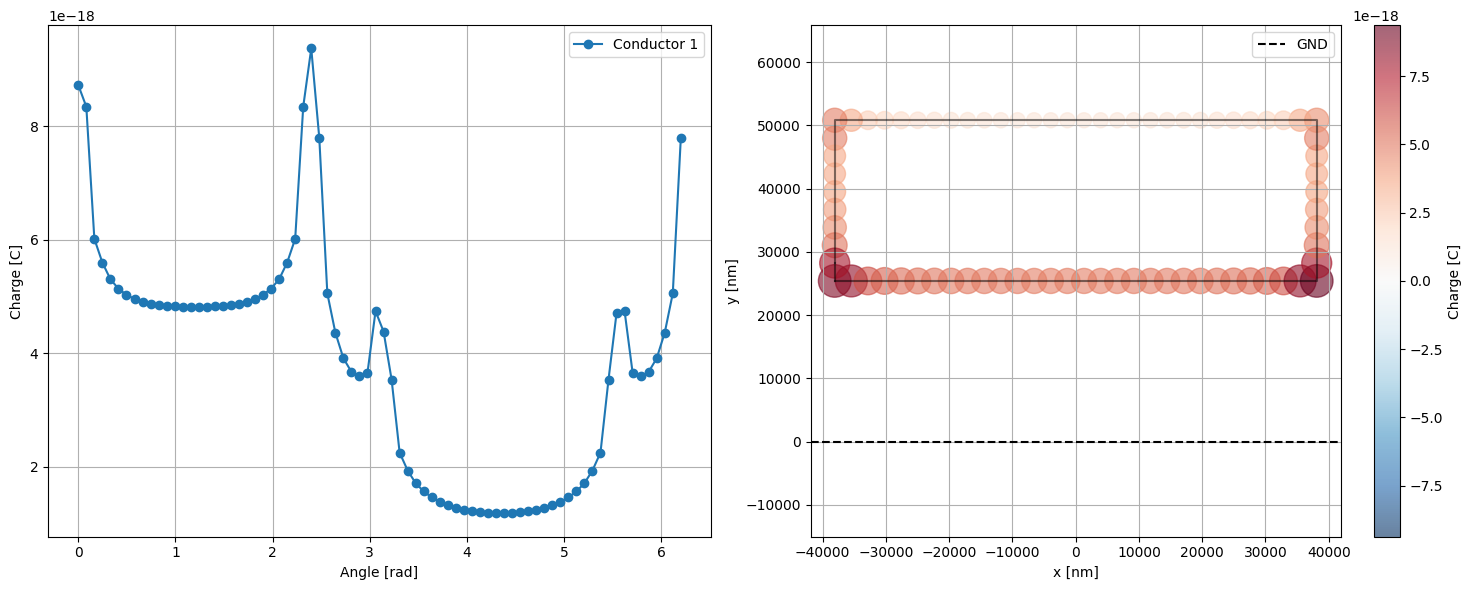

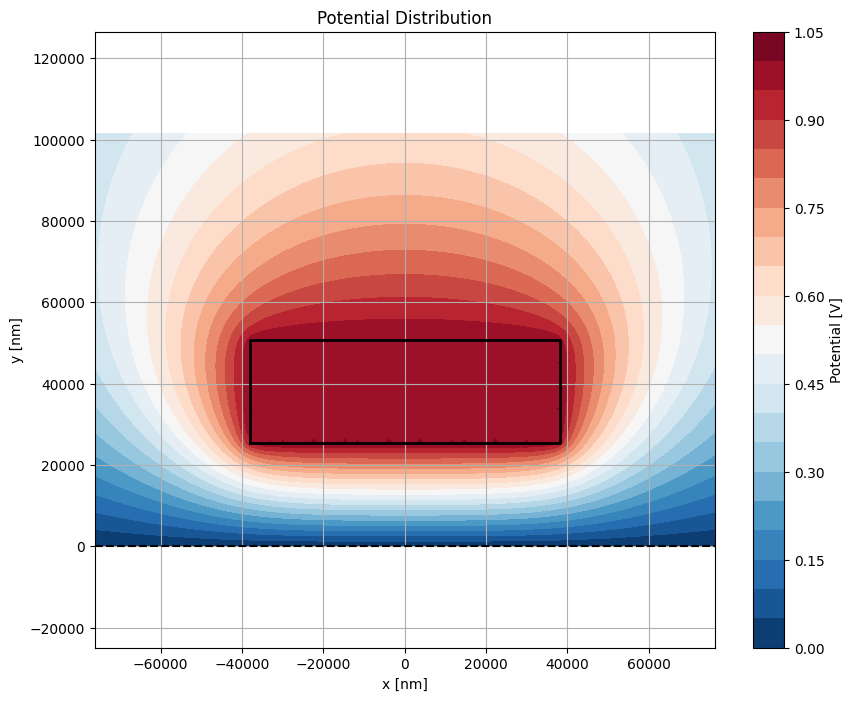

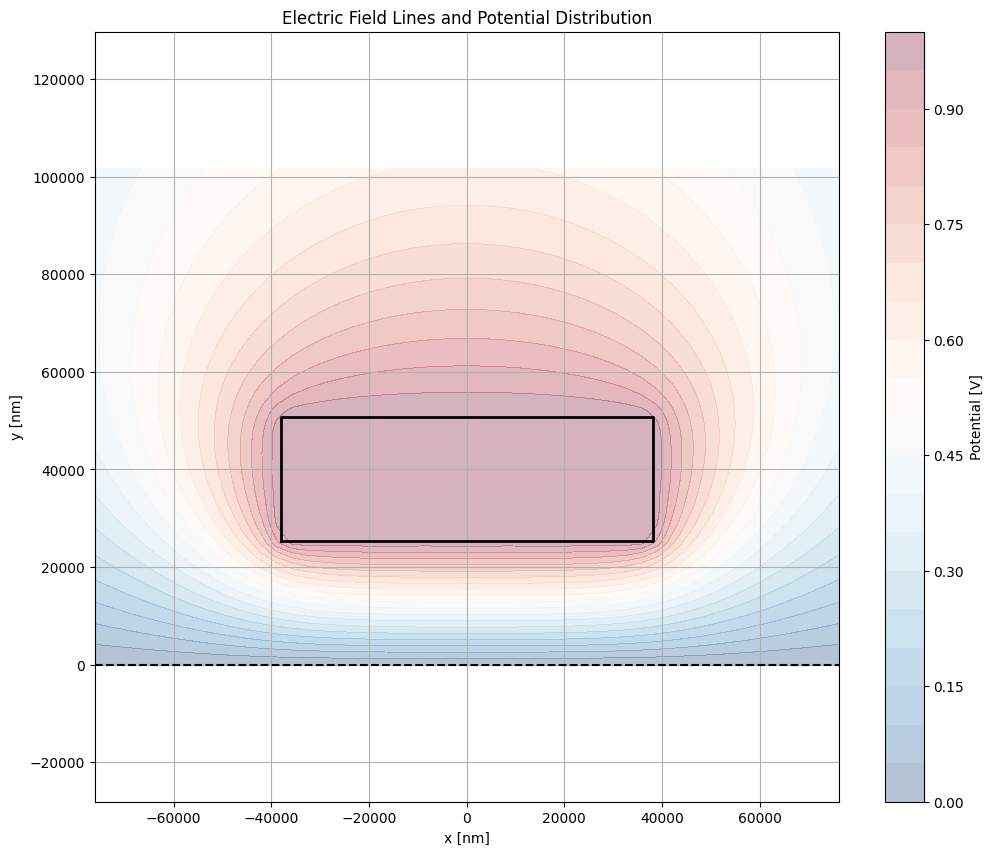


 C Matrix [F/m]:
[[1.09684335e-10]]
Capacitance matrix has been saved to ./out/test_pcb_ms1.csv
Conductor 1 charge density range: -1.2947721684286993e-12 -1.0661931867526694e-15
Conductor 1 total charge: -4.694996179316271e-18
Conductor 2 charge density range: 4.866856612514491e-13 3.480836748068996e-12
Conductor 2 total charge: 3.0628774607064996e-17


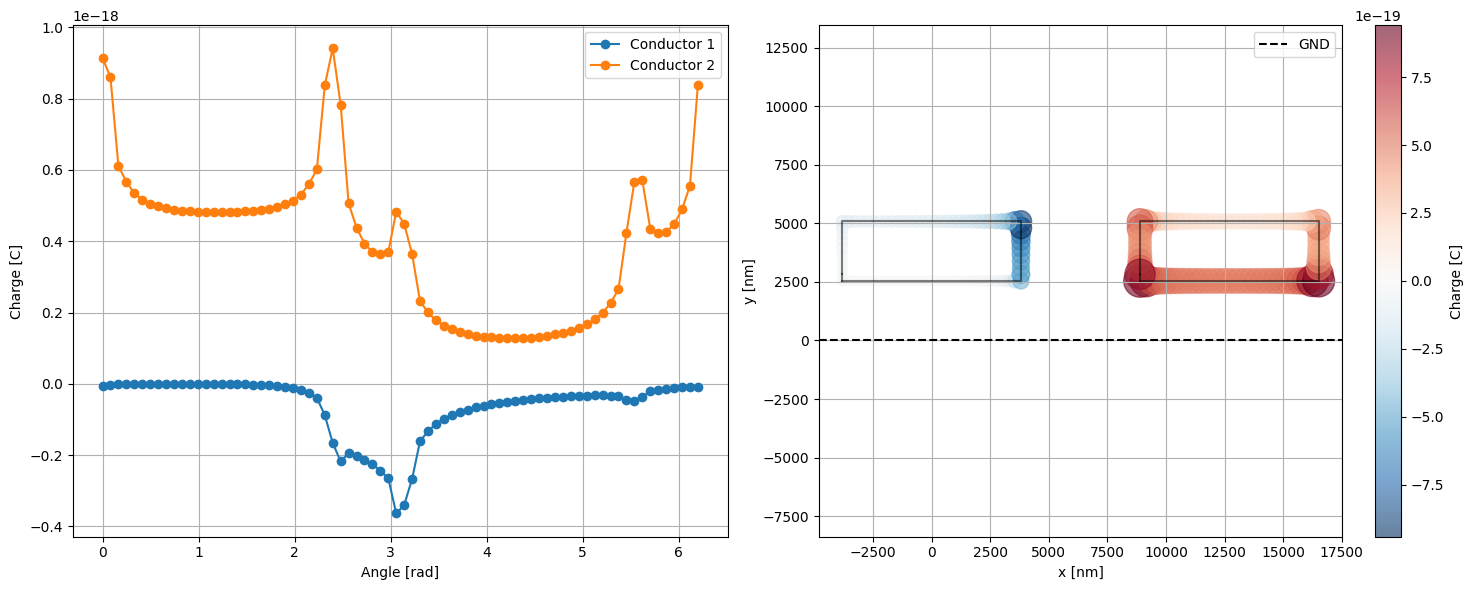

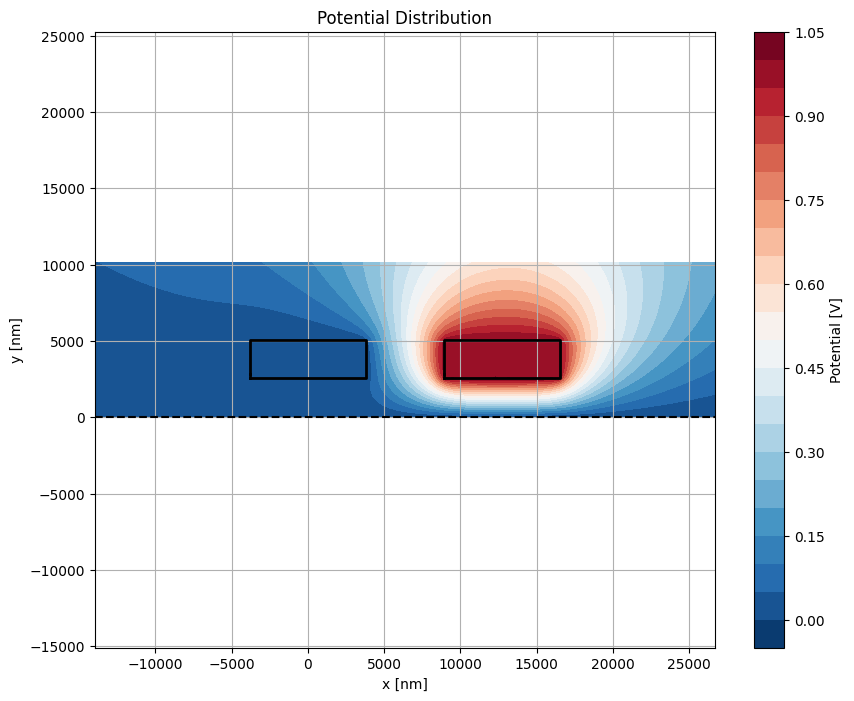

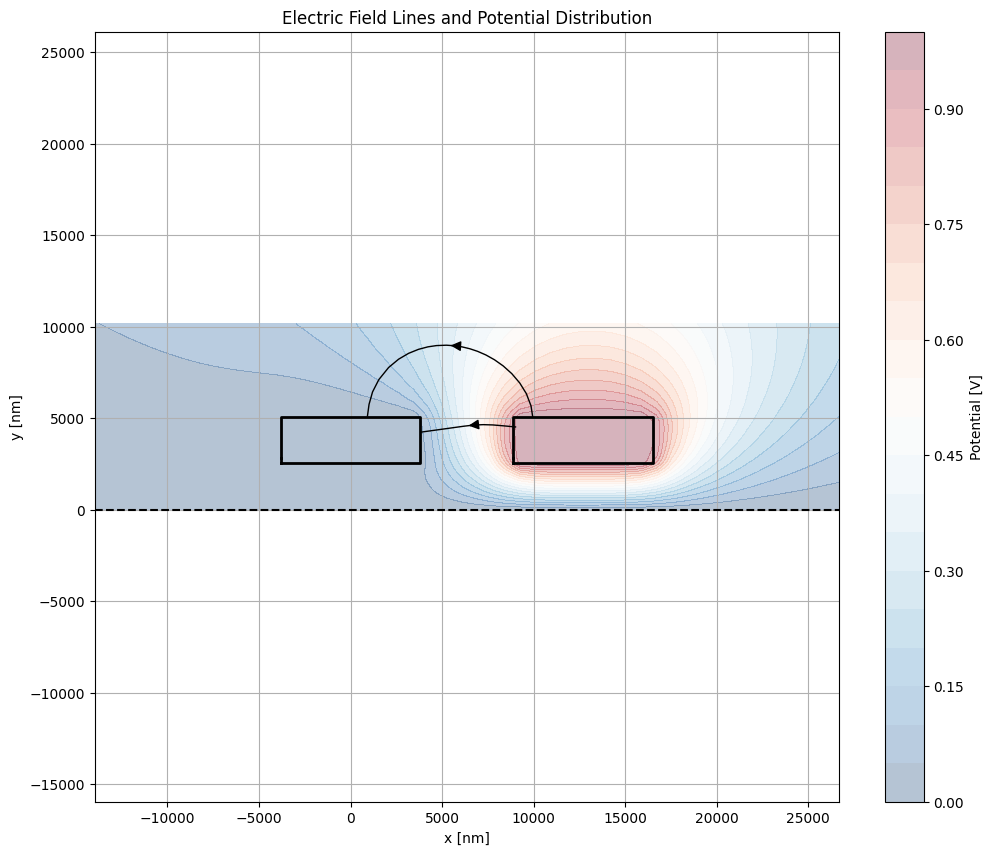


 C Matrix [F/m]:
[[ 1.14098414e-10 -1.72734739e-11]
 [-1.72734739e-11  1.14098414e-10]]
Capacitance matrix has been saved to ./out/test_pcb_ms2.csv
Conductor 1 charge density range: -2.8833890216379322e-12 -1.3412823693098927e-12
Conductor 1 total charge: -2.5891644291997655e-16


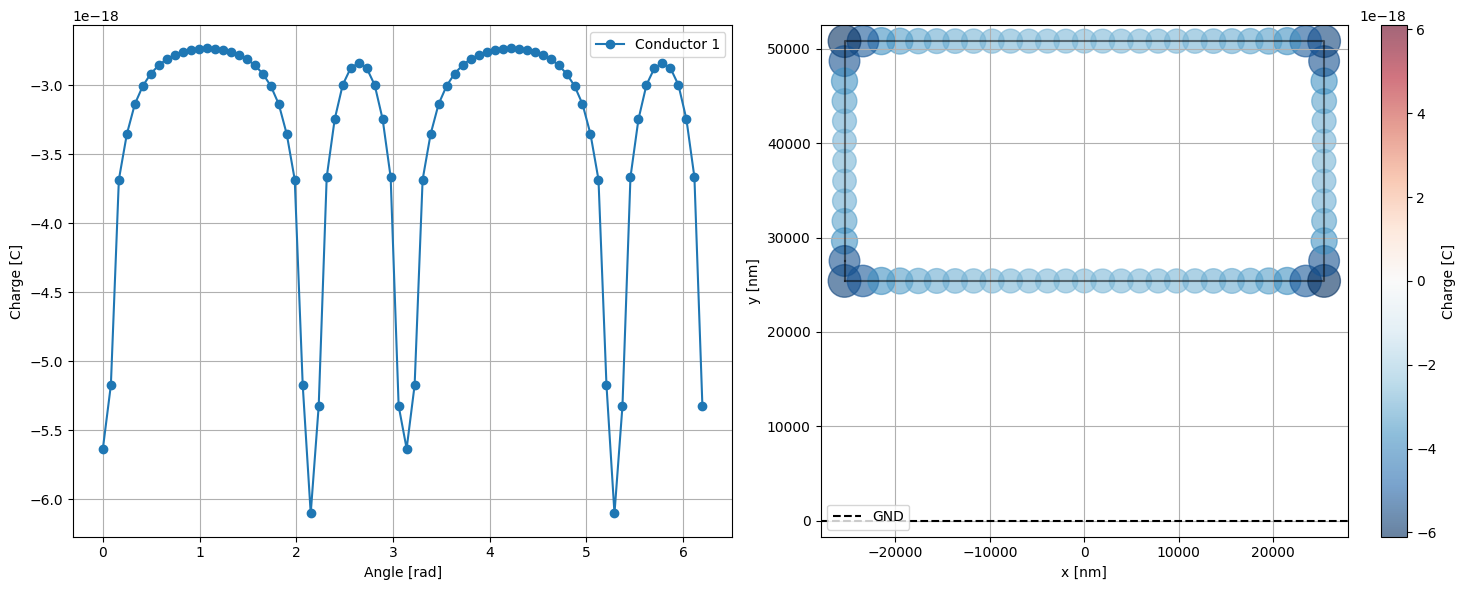

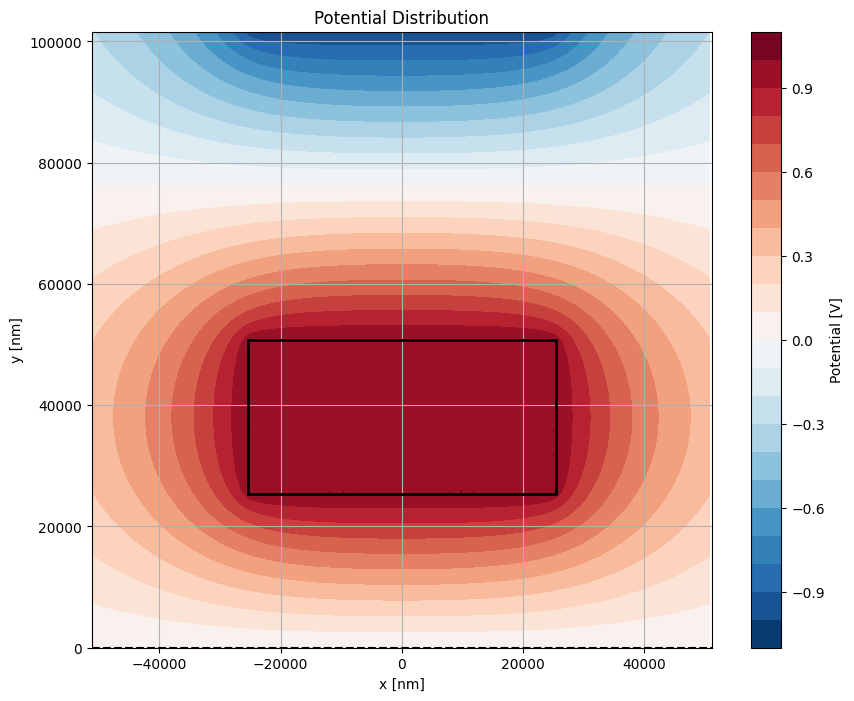

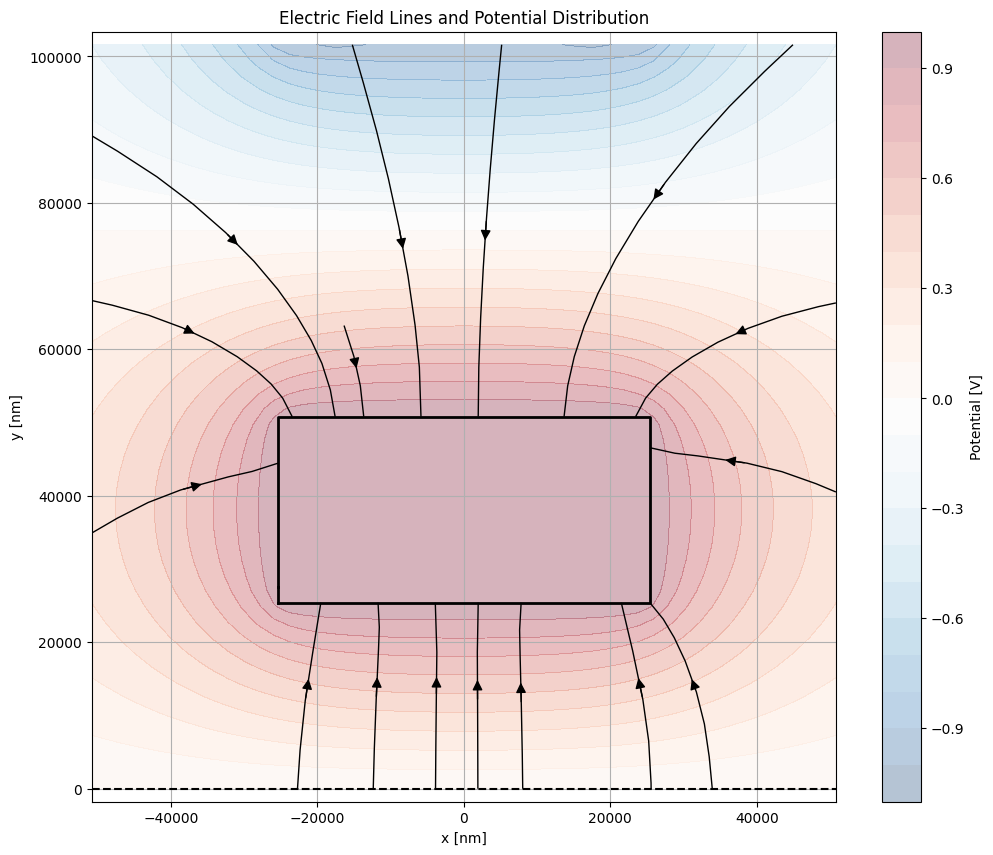


 C Matrix [F/m]:
[[-1.28959643e-10]]
Capacitance matrix has been saved to ./out/test_pcb_sp1.csv
Conductor 1 charge density range: -3.5497071176105e-12 -1.8100228156014131e-12
Conductor 1 total charge: -4.4028418443183414e-16
Conductor 2 charge density range: 6.51517177882087e-18 6.001804517310517e-13
Conductor 2 total charge: 1.8512515865561455e-17


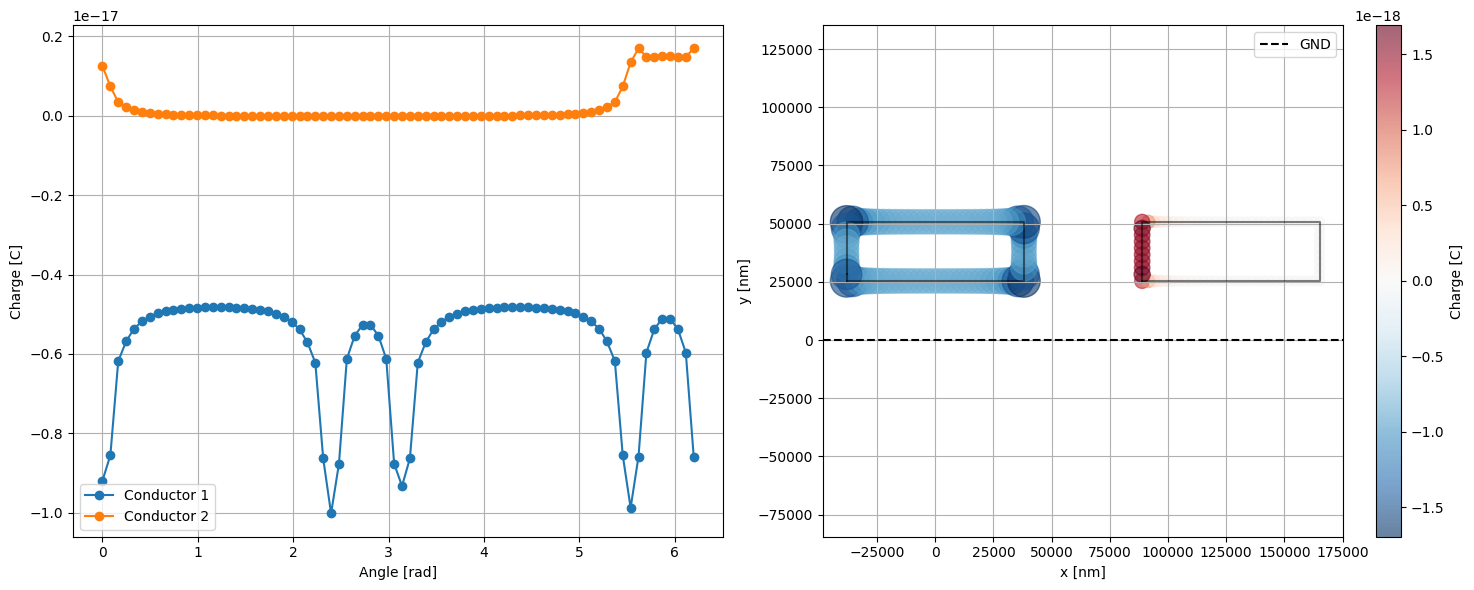

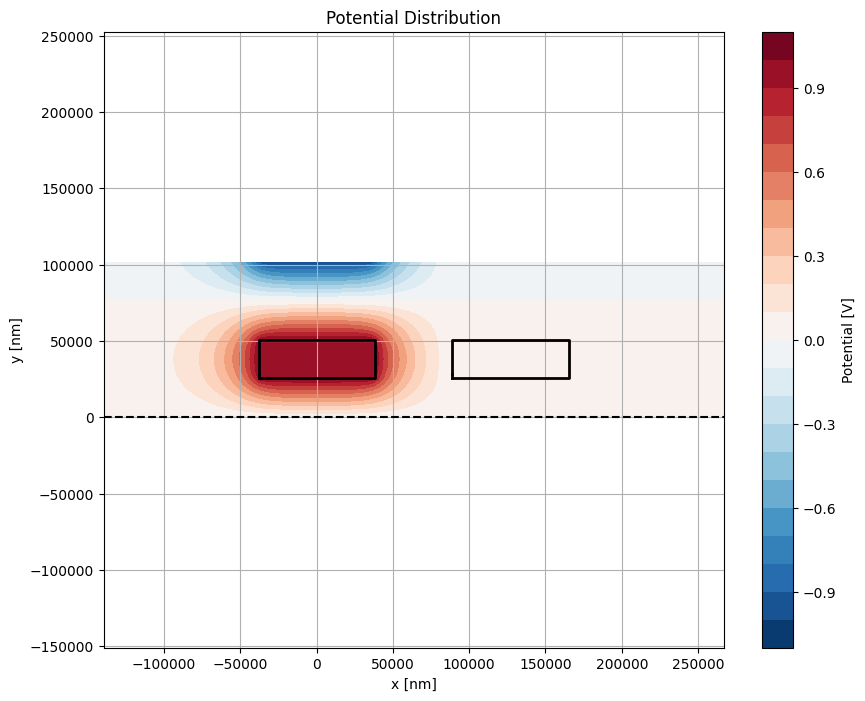

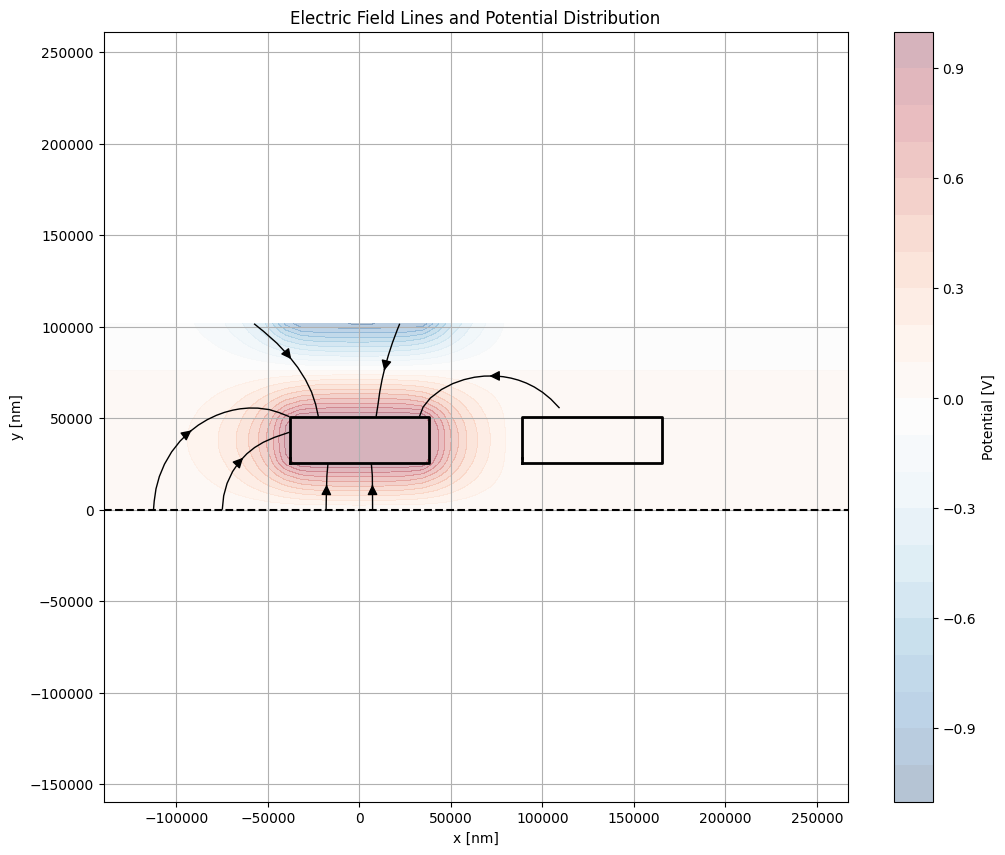


 C Matrix [F/m]:
[[-1.64376850e-10  6.68704857e-12]
 [ 6.68704857e-12 -1.64376850e-10]]
Capacitance matrix has been saved to ./out/test_pcb_sp2.csv


In [11]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib
import multiconcalc             # まずモジュールをインポート
importlib.reload(multiconcalc)  # クラスを更新した場合更新を反映させるため再読み込み
from multiconcalc import MultiConductorCalculator

# PCB Microstrip Line 1導体のテスト
def test_pcb_ms1():
    calculator = MultiConductorCalculator(epsilon_r=2.0)
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0

    # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )

    # 電圧設定
    voltages = [1.0]

    charge_density = calculator.solve_charge_density(voltages)
    calculator.plot_chage_distribution(charge_density)
    calculator.plot_potential(charge_density) 
    
    # 電気力線描画
    calculator.plot_electric_field_lines(charge_density, n_lines=20)

    # 容量行列
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    # ピコファラッド単位で出力
    calculator.export_capacitance_matrix("./out/test_pcb_ms1.csv", unit_prefix='p' , length=0.0254 )

# PCB Microstrip Line 2導体のテスト
def test_pcb_ms2():
    calculator = MultiConductorCalculator(epsilon_r=2.0)
    
    w = 7.62e-6  # 2mil
    h = 2.54e-6  # 1mil
    n = 80
    bh1 = 2.54e-6  # 1mil
    xo1 = 0
    xo2 = 12.7e-6  # 5mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )

    # Modified voltages array to match the number of conductors
    voltages = [0.0 ,1.0]
    

    charge_density = calculator.solve_charge_density(voltages)
    calculator.plot_chage_distribution(charge_density)
    calculator.plot_potential(charge_density) 
    
    # 電気力線描画
    calculator.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    # ピコファラッド単位で出力
    calculator.export_capacitance_matrix("./out/test_pcb_ms2.csv", unit_prefix='p' , length=0.0254 )


# StripLineのテスト 1導体
def test_pcb_sp1():
    calculator = MultiConductorCalculator(epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 5.08e-5  # 20mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )

    # Modified voltages array to match the number of conductors
    voltages = [1.0]
    

    charge_density = calculator.solve_charge_density(voltages)
    calculator.plot_chage_distribution(charge_density)
    calculator.plot_potential(charge_density) 
    
    # 電気力線描画
    calculator.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    # pf/inchで出力
    calculator.export_capacitance_matrix("./out/test_pcb_sp1.csv", unit_prefix='p' , length=0.0254 )


# PCBのテスト 2導体
def test_pcb_sp2():
    calculator = MultiConductorCalculator(epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 50mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )

    # Modified voltages array to match the number of conductors
    voltages = [1.0, 0.0]
    

    charge_density = calculator.solve_charge_density(voltages)
    calculator.plot_chage_distribution(charge_density)
    calculator.plot_potential(charge_density) 
    
    # 電気力線描画
    calculator.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    calculator.export_capacitance_matrix("./out/test_pcb_sp2.csv", unit_prefix='p', length=0.0254)


if __name__ == "__main__":
  test_pcb_ms1()
  test_pcb_ms2()
  test_pcb_sp1()
  test_pcb_sp2()
